In [1]:
%load_ext autoreload
%autoreload 2

from graphs import *
from integer_and_scipy import *
from gallagher_algorithm import *
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

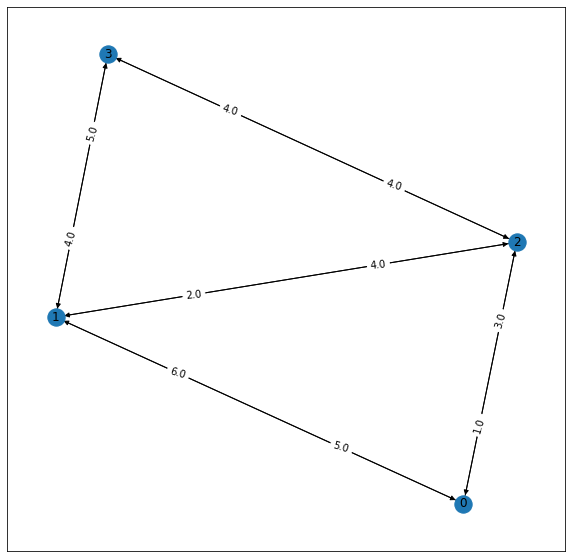

In [2]:
G = netFromPickle('4_node.pkl')
G.visualize(withEdgeTraffic=True)
plt.gcf().set_size_inches(10, 10)

In [3]:
G.setPhi(shortestPathsPhi(G))
print('D_T original: ', G.D_T())

res, phi_best = optim(G)

G.setPhi(phi_best)
print('D_T post optimization: ', G.D_T())

D_T original:  116.0
D_T post optimization:  79.11023622047244


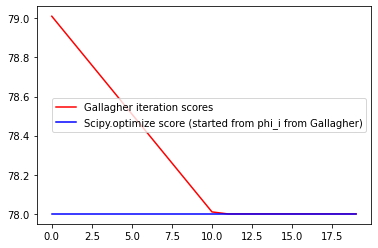

In [4]:
scores, phis = iterGallagher(G, eta=0.1, retPhi=True)
n_vals = len(phis)
opt_scores = np.empty(n_vals)
opt_phis = np.empty((n_vals, ) + G.phi.shape)
for i, phi in enumerate(phis):
    G.setPhi(phi)
    res, phi_curr = optim(G)
    G.setPhi(phi_curr)
    assert(G.checkPhi())
    opt_scores[i] = res.fun
    opt_phis[i] = phi_curr
    
plt.plot(np.arange(n_vals), scores[1:], 'r-', label='Gallagher iteration scores')
plt.plot(np.arange(n_vals), opt_scores, 'b-', label='Scipy.optimize score (started from phi_i from Gallagher)');
plt.legend()